# Confusion Matrix

CONFUSION MATRIX  ::

As we noticed in the previous part, we care not only about how many datapoints we predict the correct class for, we care about how many of the positive datapoints we predict correctly for as well as how many of the negative datapoints we predict correctly.

We can see all the important values in what is called the Confusion Matrix (or Error Matrix or Table of Confusion).

The Confusion Matrix is a table showing four values:

     • Datapoints we predicted positive that are actually positive
     • Datapoints we predicted positive that are actually negative
     • Datapoints we predicted negative that are actually positive
     • Datapoints we predicted negative that are actually negative
     
The first and fourth are the datapoints we predicted correctly and the second and third are the datapoints we predicted incorrectly.

The confusion matrix fully describes how a model performs on a dataset, though is difficult to use to compare models.



TRUE POSITIVE, TRUE NEGATIVE, FALSE POSITIVE, FALSE NEGATIVE  ::

We have names for each square of the confusion matrix:

     A true positive (TP) is a datapoint we predicted positively that we were correct about.
     A true negative (TN) is a datapoint we predicted negatively that we were correct about.
     A false positive (FP) is a datapoint we predicted positively that we were incorrect about.
     A false negative (FN) is a datapoint we predicted negatively that we were incorrect about.

# Precision and Recall

Precision refers to the percentage of positive results which are relevant 

    Precision is the percent of the model’s positive predictions that are correct.
    
    precision  = positives predicted correctly / positive predictions
               
               = TP / (TP + FP)

Recall to the percentage of positive cases correctly classified.

     Recall = positives predicted correctly / positive cases 
            
            = TP / (TP + FN)
            
We often will be in a situation of choosing between increasing the recall (while lowering the precision) or 

increasing the precision (and lowering the recall). It will depend on the situation which we’ll want to maximize.

For example, let’s say we’re building a model to predict if a credit card charge is fraudulent. The positive cases for our model are fraudulent charges and the negative cases are legitimate charges.

Let’s consider two scenarios:
1. If we predict the charge is fraudulent, we’ll reject the charge.
2. If we predict the charge is fraudulent, we’ll call the customer to confirm the charge.

In case 1, it’s a huge inconvenience for the customer when the model predicts fraud incorrectly (a false positive).

In case 2, a false positive is a minor inconvenience for the customer.
               
The higher the false positives, the lower the precision. Because of the high cost to false positives in the first case, it would be worth having a low recall in order to have a very high precision. In case 2, you would want more of a balance between precision and recall.

There is often a trade-off between precision and recall. Increasing the model's precision means making the model less sensitive, to lower the false positive rate. But a less sensitive model could also miss more actual positives, leading to a lower recall. Increasing the model's recall means making the model more sensitive, to lower the false negative rate. But a more sensitive model could also incorrectly flag more false positives, leading to lower precision.

CASE SCENARIO ::
We’re building a model to predict spam email. The positive cases are spam and the negative cases are legitimate. If we’re going to delete email that we predict is spam, which is more important to maximize?

      It is important to maximize the preciseness ( by increasing precision) in this case; Since the False Positives will 
      get DELETED ( emails that are not spam but our model predicts as spam) so an important email might get deleted, due
      to a wrong prediction. Here FP are costing us a lot. So we'd better minimize them. (By increasing precision)
      
      It well known that spam emails are very less as compared to legitimate (important) emails. Precision=TP/(TP+FP)   
      Recall=TP/(TP+FN) FP>FN (TP+FP)>(TP+FN) ∴ Precision<Recall It is important to maximize the preciseness ( by increasing 
      precision) Because .with.. FalsePositives(emails) legitimate(important) emails will also be """deleted """, due to a
      wrong prediction. FP is costing more than FN WE HAVE TO MAXIMIZE--Precision=TP/(TP+FP)
      
      In general given any problem like this and before you pick up your choice between precision and Recall, firstly 
      determine which you care about minimizing or maximizing of( FP or FN) becaus they affect directly the precision and 
      Recall. Increase FP will lower precision, decrease it will increase precision. Increase FN will lower Recall, decrease 
      it will increase Recall. Precision=TP/(TP+FP) Recall=TP/(TP+FN)

# F1 Score

Accuracy was an appealing metric because it was a single number. Precision and recall are two numbers so it’s not always obvious how to choose between two models if one has a higher precision and the other has a higher recall. The F1 score is an average of precision and recall so that we have a single score for our model.

Mathematical formula for the F1 score:

      F1 = 2 * (Precision * Recall) / (Precision + Recall)
      
The F1 score is the harmonic mean of the precision and recall values.



# Calculating Metrics in Scikit-learn


Scikit-learn has a function built in for each of the metrics(accuracy, precision, recall and F1 score)

Each function takes two 1-dimensional numpy arrays: the true values of the target & the predicted values of the target.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the titanic dataset

titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [3]:
#Changing the Sex column to boolean values 

titanic['Male'] = titanic['Sex'] == 'male'
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [4]:
#Fitting a logistic regression model to titanic  dataset

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

X = titanic[['Pclass', 'Male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare' ]]
Y = titanic['Survived']

model.fit(X,Y)
y_pred = model.predict(X)

In [5]:
# Calculating the metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("accuracy:", accuracy_score(Y, y_pred))
print("precision:", precision_score(Y, y_pred))
print("recall:", recall_score(Y, y_pred))
print("f1 score:", f1_score(Y, y_pred))

accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score: 0.7342549923195083


We see that the accuracy is 80% which means that 80% of the model’s predictions are correct. 

The precision is 78%, that is the percent of the model’s positive predictions that are correct. 

The recall is 68%, which is the percent of the positive cases that the model predicted correctly. 

The F1 score is 73%, which is an average of the precision and recall.

With a single model, the metric values do not tell us a lot. For some problems a value of 60% is good, and for others a value of 90% is good, depending on the difficulty of the problem. We will use the metric values to compare different models to pick the best one

Confusion Matrix in Sklearn

Scikit-learn has a confusion matrix function that we can use to get the four values in the confusion matrix (true positives, false positives, false negatives, and true negatives). Assuming y is our true target values and y_pred is the predicted values,

we can use the confusion_matrix function as follows:

In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y, y_pred))

[[475  70]
 [103 239]]


Scikit-learn reverses the confusion matrix to show the negative counts first! Here is how this confusion matrix should be labeled.

confusion Matrix in scikit-learn
    
                   PN    PP   
actual negative............(TN) ... (FP)   ... [[475  70]

actual positive.............(FN) ... (TP)  ...   [103 239]]




Normally;
            
                     AP   AN
predicted positive ..........(TP).. (FP)..[[239 70]]

predicted negative .........(FN).. (TN)..[[103 475]]

# How to Build an ROC Curve


The ROC curve is a graph of the specificity vs the sensitivity. We build a Logistic Regression model and then calculate the specificity and sensitivity for every possible threshold. Every predicted probability is a threshold. If we have 5 datapoints with the following predicted probabilities: 0.3, 0.4, 0.6, 0.7, 0.8, we would use each of those 5 values as a threshold.

Note that we actually plot the sensitivity vs (1-specificity). There is no strong reason for doing it this way besides that it’s the standard.

Let’s start by looking at the code to build the ROC curve. Scikit-learn has a roc_curve function we can use. The function takes the true target values and the predicted probabilities from our model.

We first use the predict_proba method on the model to get the probabilities. Then we call the roc_curve function. The roc_curve function returns an array of the false positive rates, an array of the true positive rates and the thresholds. The false positive rate is 1-specificity (x-axis) and the true positive rate is another term for the sensitivity (y-axis). The threshold values won’t be needed in the graph.

Code for plotting the ROC curve in matplotlib and code for plotting a diagonal line, this can help us visually see how far our model is from a model that predicts randomly:

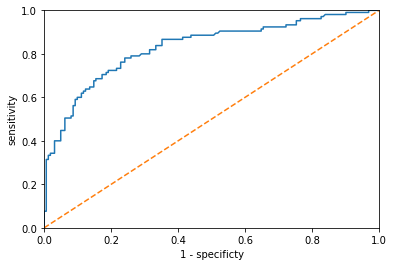

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
model1.fit(X_train, Y_train)
y_pred_proba1 = model1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('1 - specificty')
plt.ylabel('sensitivity')

plt.show()

TP - Real positive predicted positive (correct) 

TN - Real negative predicted negative (correct) 

FP - Real negative predicted positive (incorrect) 

FN - Real positive predicted negative (incorrect) 

Specificity is the % of all real negatives that were  predicted correctly: TN/(TN+FP). Also called the True Negative Rate

Corrolary: (1 - Specificity) = FP/(TN+FP). Also called the False Positive Rate (or False Alarm Rate)  "fpr"

Sensitivity is the % of all real positives that were predicted correctly: TP/(TP+FN). Also called the True Positive Rate "tpr"

The ROC curve is showing the performance, not of a single model, but of many models. Each choice of threshold is a different model.

Assuming we have points A, B, C highlighted at specific regions

Each point A, B & C refers to a model with a different threshold.

comparing to the graph:
Model A has a sensitivity of 0.6 and a specificity of 0.9 (recall that the graph is showing 1-specificity).
Model B has a sensitivity of 0.8 and a specificity of 0.7.
Model C has a sensitivity of 0.9 and a specificity of 0.5.

How to choose between these models will depend on the specifics of our situation.
The closer the curve gets to the upper left corner, the better the performance. The line should never fall below the diagonal line as that would mean it performs worse than a random model.

# Picking a Model from the ROC Curve

When we’re ready to finalize our model, we have to choose a single threshold that we’ll use to make our predictions. The ROC curve is a way of helping us choose the ideal threshold for our problem

looking at our ROC curve again assuming the three highlighted points

If we are in a situation where it’s more important that all of our positive predictions are correct than that we catch all the positive cases (meaning that we predict most of the negative cases correctly), we should choose the model with higher specificity (model A).

If we are in a situation where it’s important that we catch as many of the positive cases as possible, we should choose the model with the higher sensitivity (model C).

If we want a balance between sensitivity and specificity, we should choose model B.

# Area Under the Curve

We’ll sometimes what to use the ROC curve to compare two different models. 

Area Under the Curve, also called the AUC. This is the area under the ROC curve. It’s a value between 0 and 1, the higher the better.

ROC is a graph of all the different Logistic Regression models with different thresholds, the AUC does not measure the performance of a single model. It gives a general sense of how well the Logistic Regression model is performing. To get a single model, you still need to find the optimal threshold for your problem.

Using scikit-learn we can calculate the area under the curve, through the roc_auc_score function.


Here is a comparison of the ROC curves of two models:

    We will use the roc_auc_score function to calculate the AUC score of a Logistic Regression model on the Titanic dataset.
    We will build two Logistic Regression models, model with 6 features and a model with just Pclass and male features.

In [35]:
from sklearn.metrics import roc_auc_score

print("model 1 AUC score:", roc_auc_score(Y_test, y_pred_proba1[:, 1]))

model 1 AUC score: 0.8304526748971194


In [38]:
model2 = LogisticRegression()

X1 = titanic[['Pclass', 'Male' ]]
Y1 = titanic['Survived']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 1)
model2.fit(X1_train, Y1_train)
y_pred_proba2 = model2.predict_proba(X1_test)

print("model 2 AUC score:", roc_auc_score(Y1_test, y_pred_proba2[:, 1]))

model 2 AUC score: 0.8340094062316284


metric tells us how well in general a Logistic Regression model performs on our data. As an ROC curve shows the performance of multiple models, the AUC is not measuring the performance of a single model.


# k-fold Cross Validation


CONCERNS WITH THE TRAINING AND  TEST SET: 

We are doing evaluation because we want to get an accurate measure of how well the model performs. If our dataset is small, our test set is going to be small. Thus it might not be a good random assortment of datapoints and by random chance end up with easy or difficult datapoints in our evaluation set.

Since our goal is to get the best possible measure of our metrics (accuracy, precision, recall and F1 score), we can do a little better than just a single training and test set.

Training Set is used to build the model while the Test Set is used to evaluate the model

To see this empirically, we try running the prev code which does a train/test split. We’ll re-run it a few times and see the results.

It is seen that each time we run it, we get different values for the metrics. The accuracy ranges from 0.79 to 0.84, the precision from 0.75 to 0.81 and the recall from 0.63 to 0.75. These are wide ranges that just depend on how lucky or unlucky we were in which datapoints ended up in the test set.

Instead of doing a single train/test split, we’ll split our data into a training set and test set multiple times.

We can get different values for the evaluation metrics. We want to get a measure of how well our model does in general, not just a measure of how well it does on one specific test set.

Instead of just taking a chunk of the data as the test set, let’s break our dataset into 5 chunks. Let’s assume we have 200 datapoints in our dataset.

Each of these 5 chunks will serve as a test set. When Chunk 1 is the test set, we use the remaining 4 chunks as the training set. Thus we have 5 training and test sets

Each of the 5 times we have a test set of 20% (40 datapoints) and a training set of 80% (160 datapoints).

For each training set, we build a model and evaluate it using the associated test set. Thus we build 5 models and calculate 5 scores

We report the accuracy as the mean of the 5 values:

If we had just done a single training and test set and had randomly gotten the first one, we would have reported an accuracy of 0.83. If we had randomly gotten the last one, we would have reported an accuracy of 0.75. Averaging all these possible values helps eliminate the impact of which test set a datapoint lands in.

You will only see values this different when you have a small dataset. With large datasets we often just do a training and test set for simplicity.

This process for creating multiple training and test sets is called k-fold cross validation. The k is the number of chunks we split our dataset into. The standard number is 5

Our goal in cross validation is to get accurate measures for our metrics (accuracy, precision, recall). We are building extra models in order to feel confident in the numbers we calculate and report.

# Final Model Choice in k-fold Cross Validation


Now we have built 5 models instead of just one. How do we decide on a single model to use?

These 5 models were built just for evaluation purposes, so that we can report the metric values. We don’t actually need these models and want to build the best possible model. The best possible model is going to be a model that uses all of the data. So we keep track of our calculated values for our evaluation metrics and then build a model using all of the data.

This may seem incredibly wasteful, but computers have a lot of computation power, so it’s worth using a little extra to make sure we’re reporting the right values for our evaluation metrics. We’ll be using these values to make decisions, so calculating them correctly is very important.


# k-fold Cross Validation in Sklearn


Scikit-learn has already implemented the code to break the dataset into k chunks and create k training and test sets.

We start by instantiating a KFold class object. It takes two parameters: n_splits (this is k, the number of chunks to create) and shuffle (whether or not to randomize the order of the data). It’s generally good practice to shuffle the data since you often get a dataset that’s in a sorted order.

The KFold class has a split method that creates the 3 splits for our data.

Let’s look at the output of the split method. The split method returns a generator, so we use the list function to turn it into a list.

     kf = KFold(n_splits=3, shuffle=True)
     
     list(kf.split(X))